<a href="https://colab.research.google.com/github/atwine/my_first_GAN/blob/master/My_second_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adverserial Network

This is my first implementation.

The dataset I am using if from: https://github.com/zalandoresearch/fashion-mnist

We can also just download and upload the data if you have a good internet connection

In [3]:
##let's load the libraries that we will need 
from __future__ import print_function, division

from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt
import sys
import numpy as np

Using TensorFlow backend.


In [0]:
#helper class
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1 #the images we are going to use are black and white.
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 10 #we initialize the noise that the generator takes in.

        optimizer = Adam(0.0002, 0.5) #the optimizer we are going to work with

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(2048))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))

        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=64, sample_interval=50):

        # Load the dataset
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

        # Rescale -1 to 1
        x_train = x_train / 127.5 - 1.
        x_train = np.expand_dims(x_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            imgs = x_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        #fig.savefig("images/%d.png" % epoch)
        plt.show()
        plt.close()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_32 (LeakyReLU)   (None, 256)              

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.692997, acc.: 48.44%] [G loss: 0.669447]


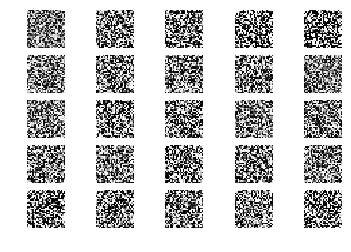

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.706264, acc.: 50.00%] [G loss: 0.664208]
2 [D loss: 0.682760, acc.: 50.00%] [G loss: 0.667036]
3 [D loss: 0.655177, acc.: 50.00%] [G loss: 0.656708]
4 [D loss: 0.590773, acc.: 50.00%] [G loss: 0.620737]
5 [D loss: 0.688877, acc.: 76.56%] [G loss: 0.560627]
6 [D loss: 0.599621, acc.: 79.69%] [G loss: 0.611060]
7 [D loss: 0.600342, acc.: 78.12%] [G loss: 0.764646]
8 [D loss: 0.456925, acc.: 81.25%] [G loss: 1.030814]
9 [D loss: 0.295446, acc.: 96.88%] [G loss: 1.904958]
10 [D loss: 0.318101, acc.: 85.94%] [G loss: 2.240812]
11 [D loss: 0.179487, acc.: 93.75%] [G loss: 1.718517]
12 [D loss: 0.118807, acc.: 96.88%] [G loss: 4.491211]
13 [D loss: 0.280826, acc.: 87.50%] [G loss: 4.659279]
14 [D loss: 0.037174, acc.: 100.00%] [G loss: 3.488460]
15 [D loss: 0.244622, acc.: 85.94%] [G loss: 1.373221]
16 [D loss: 0.235051, acc.: 89.06%] [G loss: 1.127924]
17 [D loss: 0.237660, acc.: 85.94%] [G loss: 3.516407]
18 [D loss: 0.070925, acc.: 98.44%] [G loss: 3.531620]
19 [D loss: 0.9060

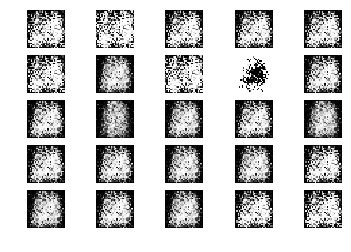

201 [D loss: 0.477812, acc.: 84.38%] [G loss: 2.144756]
202 [D loss: 0.616724, acc.: 65.62%] [G loss: 1.852385]
203 [D loss: 0.492005, acc.: 75.00%] [G loss: 2.196135]
204 [D loss: 0.635078, acc.: 51.56%] [G loss: 1.371370]
205 [D loss: 0.629991, acc.: 62.50%] [G loss: 1.824495]
206 [D loss: 0.750447, acc.: 31.25%] [G loss: 1.474388]
207 [D loss: 0.781887, acc.: 32.81%] [G loss: 1.790610]
208 [D loss: 0.727527, acc.: 46.88%] [G loss: 1.277943]
209 [D loss: 0.680881, acc.: 51.56%] [G loss: 1.672564]
210 [D loss: 0.671509, acc.: 68.75%] [G loss: 1.778596]
211 [D loss: 0.641801, acc.: 75.00%] [G loss: 1.247890]
212 [D loss: 0.616665, acc.: 68.75%] [G loss: 1.723006]
213 [D loss: 0.650911, acc.: 68.75%] [G loss: 1.736906]
214 [D loss: 0.642501, acc.: 64.06%] [G loss: 1.736958]
215 [D loss: 0.700317, acc.: 56.25%] [G loss: 2.209593]
216 [D loss: 0.700794, acc.: 56.25%] [G loss: 1.759231]
217 [D loss: 0.619523, acc.: 64.06%] [G loss: 1.765303]
218 [D loss: 0.631494, acc.: 73.44%] [G loss: 1.

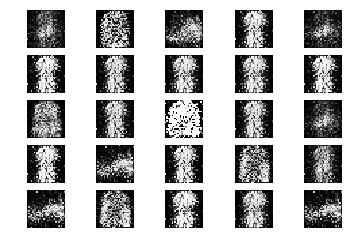

401 [D loss: 0.568249, acc.: 78.12%] [G loss: 1.496986]
402 [D loss: 0.537442, acc.: 76.56%] [G loss: 1.619359]
403 [D loss: 0.713046, acc.: 65.62%] [G loss: 1.570950]
404 [D loss: 0.711011, acc.: 51.56%] [G loss: 1.493943]
405 [D loss: 0.782037, acc.: 43.75%] [G loss: 1.132169]
406 [D loss: 0.614154, acc.: 70.31%] [G loss: 1.127204]
407 [D loss: 0.639323, acc.: 57.81%] [G loss: 0.951398]
408 [D loss: 0.567137, acc.: 68.75%] [G loss: 0.958425]
409 [D loss: 0.620313, acc.: 73.44%] [G loss: 1.025943]
410 [D loss: 0.719037, acc.: 57.81%] [G loss: 1.017943]
411 [D loss: 0.638976, acc.: 56.25%] [G loss: 0.973645]
412 [D loss: 0.611836, acc.: 62.50%] [G loss: 1.033214]
413 [D loss: 0.669838, acc.: 43.75%] [G loss: 1.019978]
414 [D loss: 0.688611, acc.: 48.44%] [G loss: 0.894629]
415 [D loss: 0.616529, acc.: 56.25%] [G loss: 0.888690]
416 [D loss: 0.644743, acc.: 57.81%] [G loss: 0.830657]
417 [D loss: 0.560175, acc.: 65.62%] [G loss: 0.992173]
418 [D loss: 0.714074, acc.: 42.19%] [G loss: 0.

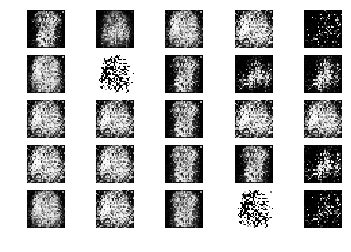

601 [D loss: 0.507322, acc.: 67.19%] [G loss: 1.476642]
602 [D loss: 0.532825, acc.: 68.75%] [G loss: 1.570633]
603 [D loss: 0.481341, acc.: 75.00%] [G loss: 1.542246]
604 [D loss: 0.515834, acc.: 75.00%] [G loss: 1.365558]
605 [D loss: 0.789467, acc.: 57.81%] [G loss: 1.509300]
606 [D loss: 0.610309, acc.: 65.62%] [G loss: 1.404837]
607 [D loss: 0.726315, acc.: 51.56%] [G loss: 1.235811]
608 [D loss: 0.800858, acc.: 53.12%] [G loss: 1.113394]
609 [D loss: 0.632527, acc.: 65.62%] [G loss: 0.942047]
610 [D loss: 0.684987, acc.: 54.69%] [G loss: 0.912685]
611 [D loss: 0.698013, acc.: 45.31%] [G loss: 1.063456]
612 [D loss: 0.641261, acc.: 64.06%] [G loss: 0.995561]
613 [D loss: 0.631375, acc.: 68.75%] [G loss: 1.026249]
614 [D loss: 0.713993, acc.: 51.56%] [G loss: 1.146201]
615 [D loss: 0.602806, acc.: 76.56%] [G loss: 0.942481]
616 [D loss: 0.550200, acc.: 75.00%] [G loss: 0.970346]
617 [D loss: 0.538752, acc.: 76.56%] [G loss: 1.010676]
618 [D loss: 0.536323, acc.: 75.00%] [G loss: 1.

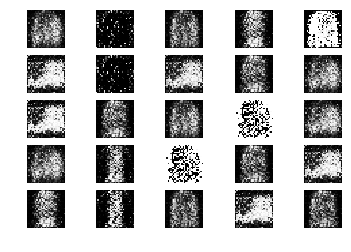

801 [D loss: 0.380543, acc.: 90.62%] [G loss: 1.252639]
802 [D loss: 0.278455, acc.: 95.31%] [G loss: 1.267158]
803 [D loss: 0.418590, acc.: 76.56%] [G loss: 1.447478]
804 [D loss: 0.525398, acc.: 70.31%] [G loss: 1.601088]
805 [D loss: 0.357217, acc.: 85.94%] [G loss: 1.525171]
806 [D loss: 0.533598, acc.: 68.75%] [G loss: 1.682432]
807 [D loss: 0.297913, acc.: 87.50%] [G loss: 1.772482]
808 [D loss: 0.364526, acc.: 84.38%] [G loss: 1.810596]
809 [D loss: 0.217135, acc.: 96.88%] [G loss: 1.799024]
810 [D loss: 0.511987, acc.: 65.62%] [G loss: 2.996266]
811 [D loss: 0.543836, acc.: 76.56%] [G loss: 1.734712]
812 [D loss: 1.065036, acc.: 71.88%] [G loss: 1.407035]
813 [D loss: 0.491115, acc.: 76.56%] [G loss: 1.248258]
814 [D loss: 0.589445, acc.: 70.31%] [G loss: 1.124398]
815 [D loss: 0.510724, acc.: 75.00%] [G loss: 1.112049]
816 [D loss: 0.494087, acc.: 81.25%] [G loss: 1.086129]
817 [D loss: 0.545886, acc.: 68.75%] [G loss: 1.170563]
818 [D loss: 0.543684, acc.: 76.56%] [G loss: 1.

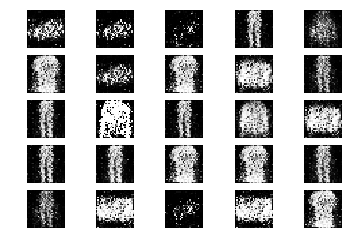

1001 [D loss: 0.517226, acc.: 78.12%] [G loss: 1.529583]
1002 [D loss: 0.495990, acc.: 84.38%] [G loss: 1.462247]
1003 [D loss: 0.515882, acc.: 71.88%] [G loss: 1.377781]
1004 [D loss: 0.531982, acc.: 75.00%] [G loss: 1.468643]
1005 [D loss: 0.612961, acc.: 64.06%] [G loss: 1.513795]
1006 [D loss: 0.486574, acc.: 76.56%] [G loss: 1.324890]
1007 [D loss: 0.425776, acc.: 82.81%] [G loss: 1.474483]
1008 [D loss: 0.512124, acc.: 81.25%] [G loss: 1.578883]
1009 [D loss: 0.399486, acc.: 81.25%] [G loss: 1.569929]
1010 [D loss: 0.448381, acc.: 75.00%] [G loss: 1.838249]
1011 [D loss: 0.397059, acc.: 87.50%] [G loss: 1.722840]
1012 [D loss: 0.660710, acc.: 64.06%] [G loss: 1.578399]
1013 [D loss: 0.444316, acc.: 82.81%] [G loss: 1.563015]
1014 [D loss: 0.464571, acc.: 81.25%] [G loss: 1.432852]
1015 [D loss: 0.788327, acc.: 57.81%] [G loss: 1.526428]
1016 [D loss: 0.646610, acc.: 68.75%] [G loss: 1.386955]
1017 [D loss: 0.636658, acc.: 67.19%] [G loss: 1.261157]
1018 [D loss: 0.503317, acc.: 7

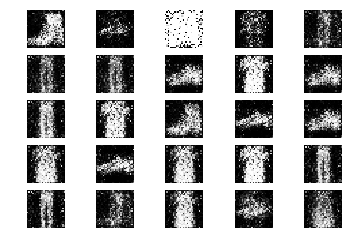

1201 [D loss: 0.604374, acc.: 67.19%] [G loss: 1.577858]
1202 [D loss: 0.489591, acc.: 79.69%] [G loss: 1.431183]
1203 [D loss: 0.765170, acc.: 60.94%] [G loss: 1.276735]
1204 [D loss: 0.538285, acc.: 71.88%] [G loss: 1.259471]
1205 [D loss: 0.644023, acc.: 60.94%] [G loss: 1.206945]
1206 [D loss: 0.604218, acc.: 67.19%] [G loss: 1.151554]
1207 [D loss: 0.729875, acc.: 53.12%] [G loss: 1.225905]
1208 [D loss: 0.781139, acc.: 51.56%] [G loss: 1.192989]
1209 [D loss: 0.564968, acc.: 70.31%] [G loss: 1.171634]
1210 [D loss: 0.523097, acc.: 79.69%] [G loss: 1.225260]
1211 [D loss: 0.693653, acc.: 56.25%] [G loss: 1.064265]
1212 [D loss: 0.675735, acc.: 54.69%] [G loss: 1.221310]
1213 [D loss: 0.612368, acc.: 67.19%] [G loss: 1.278097]
1214 [D loss: 0.709049, acc.: 59.38%] [G loss: 1.172547]
1215 [D loss: 0.652396, acc.: 62.50%] [G loss: 1.074228]
1216 [D loss: 0.594840, acc.: 68.75%] [G loss: 0.987750]
1217 [D loss: 0.618375, acc.: 65.62%] [G loss: 0.996231]
1218 [D loss: 0.584328, acc.: 7

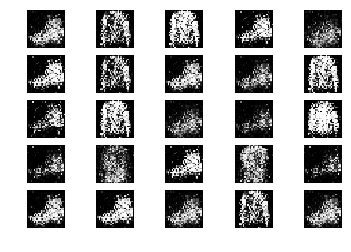

1401 [D loss: 0.317881, acc.: 87.50%] [G loss: 2.287740]
1402 [D loss: 0.566276, acc.: 81.25%] [G loss: 2.322289]
1403 [D loss: 0.266215, acc.: 90.62%] [G loss: 2.176161]
1404 [D loss: 0.536214, acc.: 73.44%] [G loss: 2.124138]
1405 [D loss: 0.355521, acc.: 85.94%] [G loss: 2.149367]
1406 [D loss: 0.373107, acc.: 81.25%] [G loss: 2.086833]
1407 [D loss: 0.307791, acc.: 87.50%] [G loss: 2.055051]
1408 [D loss: 0.428687, acc.: 78.12%] [G loss: 2.451327]
1409 [D loss: 0.422032, acc.: 81.25%] [G loss: 2.231667]
1410 [D loss: 0.456661, acc.: 79.69%] [G loss: 2.023408]
1411 [D loss: 0.386993, acc.: 87.50%] [G loss: 1.810830]
1412 [D loss: 0.461420, acc.: 81.25%] [G loss: 2.190575]
1413 [D loss: 0.324609, acc.: 89.06%] [G loss: 2.468558]
1414 [D loss: 0.500544, acc.: 79.69%] [G loss: 1.588874]
1415 [D loss: 0.361428, acc.: 85.94%] [G loss: 1.804138]
1416 [D loss: 0.431982, acc.: 82.81%] [G loss: 1.655798]
1417 [D loss: 0.420497, acc.: 81.25%] [G loss: 1.638334]
1418 [D loss: 0.303523, acc.: 8

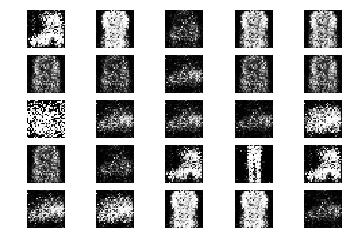

1601 [D loss: 0.627172, acc.: 60.94%] [G loss: 1.046604]
1602 [D loss: 0.544662, acc.: 68.75%] [G loss: 1.027856]
1603 [D loss: 0.670929, acc.: 65.62%] [G loss: 0.958829]
1604 [D loss: 0.617999, acc.: 68.75%] [G loss: 0.896863]
1605 [D loss: 0.625778, acc.: 64.06%] [G loss: 0.886683]
1606 [D loss: 0.601513, acc.: 60.94%] [G loss: 1.010893]
1607 [D loss: 0.577472, acc.: 70.31%] [G loss: 1.004276]
1608 [D loss: 0.494658, acc.: 79.69%] [G loss: 1.073052]
1609 [D loss: 0.563673, acc.: 70.31%] [G loss: 1.121819]
1610 [D loss: 0.562731, acc.: 67.19%] [G loss: 1.104933]
1611 [D loss: 0.516017, acc.: 79.69%] [G loss: 1.068124]
1612 [D loss: 0.587504, acc.: 70.31%] [G loss: 0.994466]
1613 [D loss: 0.559997, acc.: 73.44%] [G loss: 1.075758]
1614 [D loss: 0.506145, acc.: 71.88%] [G loss: 1.113012]
1615 [D loss: 0.435589, acc.: 81.25%] [G loss: 1.126907]
1616 [D loss: 0.475165, acc.: 75.00%] [G loss: 1.205097]
1617 [D loss: 0.484034, acc.: 76.56%] [G loss: 1.246731]
1618 [D loss: 0.556293, acc.: 6

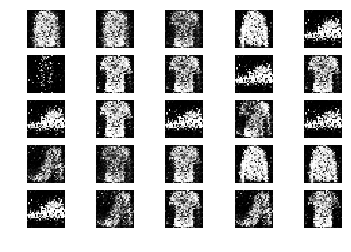

1801 [D loss: 0.581899, acc.: 68.75%] [G loss: 1.313572]
1802 [D loss: 0.528448, acc.: 79.69%] [G loss: 1.490781]
1803 [D loss: 0.414709, acc.: 84.38%] [G loss: 1.527122]
1804 [D loss: 0.604786, acc.: 64.06%] [G loss: 1.484488]
1805 [D loss: 0.519362, acc.: 71.88%] [G loss: 1.507270]
1806 [D loss: 0.553750, acc.: 76.56%] [G loss: 1.920504]
1807 [D loss: 0.465106, acc.: 81.25%] [G loss: 1.696393]
1808 [D loss: 0.663163, acc.: 75.00%] [G loss: 1.641101]
1809 [D loss: 0.526423, acc.: 75.00%] [G loss: 1.650922]
1810 [D loss: 0.518895, acc.: 82.81%] [G loss: 1.759170]
1811 [D loss: 0.517728, acc.: 73.44%] [G loss: 1.596589]
1812 [D loss: 0.505319, acc.: 79.69%] [G loss: 1.559173]
1813 [D loss: 0.475210, acc.: 73.44%] [G loss: 1.574207]
1814 [D loss: 0.520841, acc.: 67.19%] [G loss: 1.604116]
1815 [D loss: 0.449398, acc.: 73.44%] [G loss: 1.581086]
1816 [D loss: 0.582439, acc.: 59.38%] [G loss: 1.947979]
1817 [D loss: 0.406307, acc.: 79.69%] [G loss: 1.901130]
1818 [D loss: 0.583243, acc.: 7

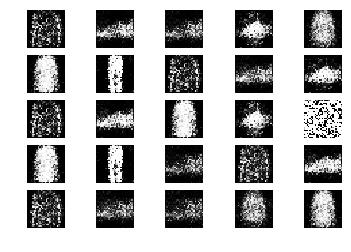

2001 [D loss: 0.735020, acc.: 46.88%] [G loss: 1.009309]
2002 [D loss: 0.633314, acc.: 67.19%] [G loss: 0.998662]
2003 [D loss: 0.729737, acc.: 45.31%] [G loss: 1.025705]
2004 [D loss: 0.676080, acc.: 50.00%] [G loss: 0.982646]
2005 [D loss: 0.712634, acc.: 50.00%] [G loss: 1.000995]
2006 [D loss: 0.650751, acc.: 64.06%] [G loss: 0.986844]
2007 [D loss: 0.664948, acc.: 57.81%] [G loss: 0.929895]
2008 [D loss: 0.731471, acc.: 46.88%] [G loss: 0.913529]
2009 [D loss: 0.630358, acc.: 68.75%] [G loss: 0.882680]
2010 [D loss: 0.723004, acc.: 46.88%] [G loss: 0.812969]
2011 [D loss: 0.654952, acc.: 60.94%] [G loss: 0.887795]
2012 [D loss: 0.731343, acc.: 48.44%] [G loss: 0.945044]
2013 [D loss: 0.688723, acc.: 53.12%] [G loss: 0.949605]
2014 [D loss: 0.685173, acc.: 54.69%] [G loss: 0.932439]
2015 [D loss: 0.664421, acc.: 60.94%] [G loss: 0.899731]
2016 [D loss: 0.669555, acc.: 50.00%] [G loss: 0.948762]
2017 [D loss: 0.623303, acc.: 62.50%] [G loss: 0.986275]
2018 [D loss: 0.667639, acc.: 6

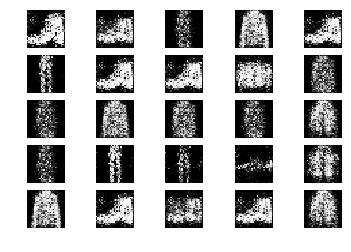

2201 [D loss: 0.606501, acc.: 60.94%] [G loss: 0.806725]
2202 [D loss: 0.606497, acc.: 67.19%] [G loss: 0.847941]
2203 [D loss: 0.634708, acc.: 57.81%] [G loss: 0.936800]
2204 [D loss: 0.562708, acc.: 68.75%] [G loss: 0.838691]
2205 [D loss: 0.583925, acc.: 70.31%] [G loss: 0.942225]
2206 [D loss: 0.524178, acc.: 73.44%] [G loss: 0.893168]
2207 [D loss: 0.688641, acc.: 57.81%] [G loss: 1.006656]
2208 [D loss: 0.597453, acc.: 62.50%] [G loss: 0.922843]
2209 [D loss: 0.539250, acc.: 76.56%] [G loss: 0.976882]
2210 [D loss: 0.526487, acc.: 75.00%] [G loss: 1.099007]
2211 [D loss: 0.476133, acc.: 79.69%] [G loss: 1.206420]
2212 [D loss: 0.468024, acc.: 75.00%] [G loss: 1.149251]
2213 [D loss: 0.475381, acc.: 78.12%] [G loss: 1.025597]
2214 [D loss: 0.543796, acc.: 82.81%] [G loss: 1.050645]
2215 [D loss: 0.613539, acc.: 68.75%] [G loss: 1.093354]
2216 [D loss: 0.488504, acc.: 78.12%] [G loss: 1.042662]
2217 [D loss: 0.552661, acc.: 68.75%] [G loss: 0.996486]
2218 [D loss: 0.554284, acc.: 6

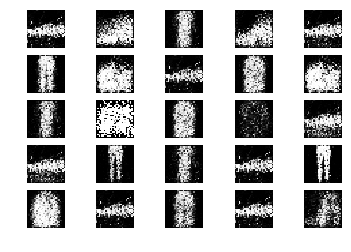

2401 [D loss: 0.539235, acc.: 73.44%] [G loss: 1.242984]
2402 [D loss: 0.571169, acc.: 60.94%] [G loss: 1.250188]
2403 [D loss: 0.590660, acc.: 59.38%] [G loss: 1.174397]
2404 [D loss: 0.607671, acc.: 62.50%] [G loss: 1.145333]
2405 [D loss: 0.559548, acc.: 70.31%] [G loss: 1.101993]
2406 [D loss: 0.575845, acc.: 57.81%] [G loss: 1.084394]
2407 [D loss: 0.562631, acc.: 75.00%] [G loss: 1.034099]
2408 [D loss: 0.629761, acc.: 68.75%] [G loss: 1.016992]
2409 [D loss: 0.712085, acc.: 65.62%] [G loss: 1.060398]
2410 [D loss: 0.518057, acc.: 81.25%] [G loss: 1.122843]
2411 [D loss: 0.533653, acc.: 71.88%] [G loss: 1.061390]
2412 [D loss: 0.569780, acc.: 68.75%] [G loss: 1.043375]
2413 [D loss: 0.468891, acc.: 85.94%] [G loss: 1.057400]
2414 [D loss: 0.594755, acc.: 68.75%] [G loss: 1.060720]
2415 [D loss: 0.560955, acc.: 78.12%] [G loss: 1.159037]
2416 [D loss: 0.617478, acc.: 67.19%] [G loss: 1.161782]
2417 [D loss: 0.598827, acc.: 67.19%] [G loss: 1.089921]
2418 [D loss: 0.589878, acc.: 6

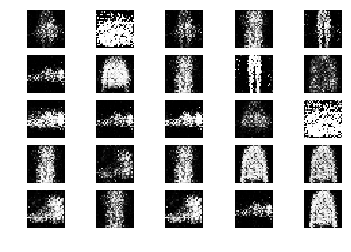

2601 [D loss: 0.522266, acc.: 71.88%] [G loss: 1.142692]
2602 [D loss: 0.694636, acc.: 57.81%] [G loss: 1.062242]
2603 [D loss: 0.570798, acc.: 64.06%] [G loss: 1.019139]
2604 [D loss: 0.637560, acc.: 65.62%] [G loss: 1.014634]
2605 [D loss: 0.720152, acc.: 46.88%] [G loss: 1.212626]
2606 [D loss: 0.576277, acc.: 75.00%] [G loss: 1.146489]
2607 [D loss: 0.559078, acc.: 71.88%] [G loss: 1.130932]
2608 [D loss: 0.539210, acc.: 79.69%] [G loss: 1.216316]
2609 [D loss: 0.511657, acc.: 64.06%] [G loss: 1.166826]
2610 [D loss: 0.473084, acc.: 71.88%] [G loss: 1.216014]
2611 [D loss: 0.412349, acc.: 82.81%] [G loss: 1.493520]
2612 [D loss: 0.568963, acc.: 68.75%] [G loss: 1.415991]
2613 [D loss: 0.454335, acc.: 84.38%] [G loss: 1.464898]
2614 [D loss: 0.832139, acc.: 62.50%] [G loss: 1.056436]
2615 [D loss: 0.625978, acc.: 60.94%] [G loss: 1.223130]
2616 [D loss: 0.533283, acc.: 76.56%] [G loss: 1.312812]
2617 [D loss: 0.541238, acc.: 71.88%] [G loss: 1.161726]
2618 [D loss: 0.508155, acc.: 7

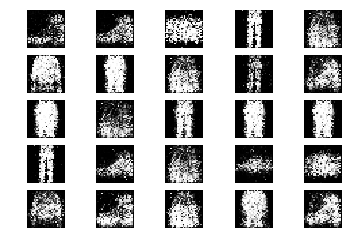

2801 [D loss: 0.415380, acc.: 87.50%] [G loss: 1.727628]
2802 [D loss: 0.451759, acc.: 76.56%] [G loss: 1.815704]
2803 [D loss: 0.485624, acc.: 79.69%] [G loss: 1.629984]
2804 [D loss: 0.500173, acc.: 71.88%] [G loss: 1.651468]
2805 [D loss: 0.490196, acc.: 78.12%] [G loss: 1.567574]
2806 [D loss: 0.517397, acc.: 78.12%] [G loss: 1.401887]
2807 [D loss: 0.591491, acc.: 65.62%] [G loss: 1.291911]
2808 [D loss: 0.500210, acc.: 71.88%] [G loss: 1.703340]
2809 [D loss: 0.569367, acc.: 60.94%] [G loss: 1.504214]
2810 [D loss: 0.805275, acc.: 50.00%] [G loss: 1.171498]
2811 [D loss: 0.538830, acc.: 68.75%] [G loss: 1.370329]
2812 [D loss: 0.540541, acc.: 65.62%] [G loss: 1.286699]
2813 [D loss: 0.573189, acc.: 73.44%] [G loss: 1.205777]
2814 [D loss: 0.509805, acc.: 73.44%] [G loss: 1.217379]
2815 [D loss: 0.482805, acc.: 73.44%] [G loss: 1.219264]
2816 [D loss: 0.521474, acc.: 73.44%] [G loss: 1.262074]
2817 [D loss: 0.486502, acc.: 73.44%] [G loss: 1.244351]
2818 [D loss: 0.436638, acc.: 7

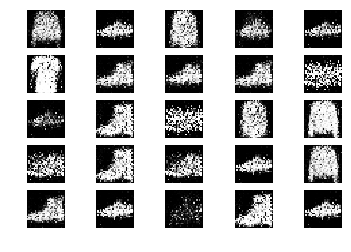

3001 [D loss: 0.705554, acc.: 59.38%] [G loss: 1.102661]
3002 [D loss: 0.655685, acc.: 59.38%] [G loss: 1.116786]
3003 [D loss: 0.616583, acc.: 57.81%] [G loss: 1.182091]
3004 [D loss: 0.726031, acc.: 46.88%] [G loss: 1.217388]
3005 [D loss: 0.645594, acc.: 65.62%] [G loss: 1.214093]
3006 [D loss: 0.614759, acc.: 70.31%] [G loss: 1.115918]
3007 [D loss: 0.755416, acc.: 50.00%] [G loss: 1.151755]
3008 [D loss: 0.679061, acc.: 59.38%] [G loss: 1.109012]
3009 [D loss: 0.651452, acc.: 57.81%] [G loss: 0.998850]
3010 [D loss: 0.557113, acc.: 78.12%] [G loss: 0.997428]
3011 [D loss: 0.628886, acc.: 68.75%] [G loss: 1.015878]
3012 [D loss: 0.641681, acc.: 57.81%] [G loss: 0.972203]
3013 [D loss: 0.691342, acc.: 56.25%] [G loss: 1.005386]
3014 [D loss: 0.729717, acc.: 48.44%] [G loss: 1.006322]
3015 [D loss: 0.674613, acc.: 68.75%] [G loss: 0.985988]
3016 [D loss: 0.689080, acc.: 56.25%] [G loss: 0.979987]
3017 [D loss: 0.644414, acc.: 65.62%] [G loss: 0.946785]
3018 [D loss: 0.592411, acc.: 7

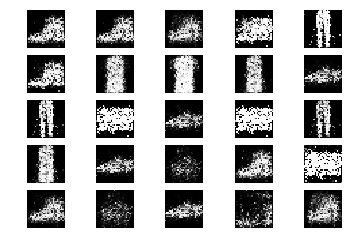

3201 [D loss: 0.509087, acc.: 76.56%] [G loss: 1.124934]
3202 [D loss: 0.617818, acc.: 65.62%] [G loss: 1.120653]
3203 [D loss: 0.479974, acc.: 70.31%] [G loss: 1.174161]
3204 [D loss: 0.517169, acc.: 73.44%] [G loss: 1.169036]
3205 [D loss: 0.371064, acc.: 85.94%] [G loss: 1.169914]
3206 [D loss: 0.468797, acc.: 82.81%] [G loss: 1.306984]
3207 [D loss: 0.441037, acc.: 84.38%] [G loss: 1.429501]
3208 [D loss: 0.564063, acc.: 75.00%] [G loss: 1.381215]
3209 [D loss: 0.572929, acc.: 71.88%] [G loss: 1.392512]
3210 [D loss: 0.423414, acc.: 81.25%] [G loss: 1.435805]
3211 [D loss: 0.465816, acc.: 75.00%] [G loss: 1.465959]
3212 [D loss: 0.497924, acc.: 70.31%] [G loss: 1.503101]
3213 [D loss: 0.483184, acc.: 75.00%] [G loss: 1.590854]
3214 [D loss: 0.565486, acc.: 73.44%] [G loss: 1.326985]
3215 [D loss: 0.489196, acc.: 81.25%] [G loss: 1.232667]
3216 [D loss: 0.549817, acc.: 73.44%] [G loss: 1.257622]
3217 [D loss: 0.505103, acc.: 75.00%] [G loss: 1.243692]
3218 [D loss: 0.501694, acc.: 7

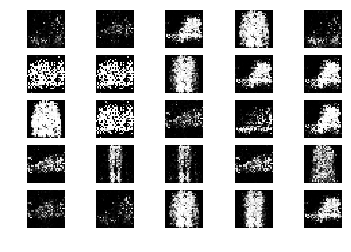

3401 [D loss: 0.507598, acc.: 78.12%] [G loss: 1.123564]
3402 [D loss: 0.512815, acc.: 76.56%] [G loss: 1.125760]
3403 [D loss: 0.587998, acc.: 62.50%] [G loss: 1.152756]
3404 [D loss: 0.573269, acc.: 73.44%] [G loss: 1.054646]
3405 [D loss: 0.608666, acc.: 65.62%] [G loss: 1.281897]
3406 [D loss: 0.521408, acc.: 73.44%] [G loss: 1.222700]
3407 [D loss: 0.616375, acc.: 64.06%] [G loss: 1.118734]
3408 [D loss: 0.587628, acc.: 70.31%] [G loss: 1.117355]
3409 [D loss: 0.460200, acc.: 78.12%] [G loss: 1.076233]
3410 [D loss: 0.456076, acc.: 79.69%] [G loss: 1.016893]
3411 [D loss: 0.683205, acc.: 53.12%] [G loss: 1.048697]
3412 [D loss: 0.564092, acc.: 67.19%] [G loss: 1.171209]
3413 [D loss: 0.487632, acc.: 76.56%] [G loss: 1.170382]
3414 [D loss: 0.658446, acc.: 60.94%] [G loss: 1.170128]
3415 [D loss: 0.656418, acc.: 62.50%] [G loss: 1.052421]
3416 [D loss: 0.648452, acc.: 62.50%] [G loss: 1.053314]
3417 [D loss: 0.489207, acc.: 78.12%] [G loss: 1.087525]
3418 [D loss: 0.580785, acc.: 6

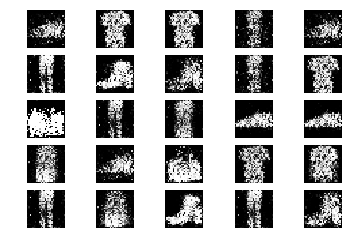

3601 [D loss: 0.618589, acc.: 65.62%] [G loss: 1.102972]
3602 [D loss: 0.668728, acc.: 53.12%] [G loss: 1.108123]
3603 [D loss: 0.615599, acc.: 64.06%] [G loss: 1.040827]
3604 [D loss: 0.667786, acc.: 59.38%] [G loss: 1.025656]
3605 [D loss: 0.628516, acc.: 57.81%] [G loss: 0.973788]
3606 [D loss: 0.664385, acc.: 60.94%] [G loss: 1.078495]
3607 [D loss: 0.590000, acc.: 67.19%] [G loss: 1.068321]
3608 [D loss: 0.612983, acc.: 65.62%] [G loss: 1.099215]
3609 [D loss: 0.668652, acc.: 54.69%] [G loss: 0.925661]
3610 [D loss: 0.676962, acc.: 57.81%] [G loss: 0.959408]
3611 [D loss: 0.683210, acc.: 50.00%] [G loss: 0.960077]
3612 [D loss: 0.672408, acc.: 56.25%] [G loss: 1.005706]
3613 [D loss: 0.660825, acc.: 57.81%] [G loss: 0.977105]
3614 [D loss: 0.642980, acc.: 53.12%] [G loss: 0.991876]
3615 [D loss: 0.682520, acc.: 56.25%] [G loss: 0.897638]
3616 [D loss: 0.639622, acc.: 60.94%] [G loss: 0.933769]
3617 [D loss: 0.601601, acc.: 62.50%] [G loss: 0.958064]
3618 [D loss: 0.554902, acc.: 6

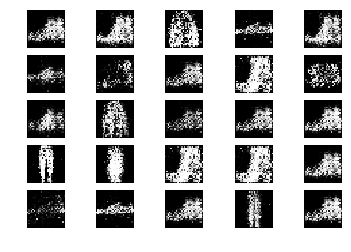

3801 [D loss: 0.632398, acc.: 70.31%] [G loss: 1.172302]
3802 [D loss: 0.459766, acc.: 75.00%] [G loss: 1.248941]
3803 [D loss: 0.535455, acc.: 71.88%] [G loss: 1.272403]
3804 [D loss: 0.477167, acc.: 75.00%] [G loss: 1.258233]
3805 [D loss: 0.549923, acc.: 70.31%] [G loss: 1.159766]
3806 [D loss: 0.446581, acc.: 82.81%] [G loss: 1.211134]
3807 [D loss: 0.613083, acc.: 65.62%] [G loss: 1.275380]
3808 [D loss: 0.530743, acc.: 71.88%] [G loss: 1.248021]
3809 [D loss: 0.522744, acc.: 73.44%] [G loss: 1.213915]
3810 [D loss: 0.540847, acc.: 70.31%] [G loss: 1.180070]
3811 [D loss: 0.497302, acc.: 78.12%] [G loss: 1.147434]
3812 [D loss: 0.485194, acc.: 78.12%] [G loss: 1.175196]
3813 [D loss: 0.515826, acc.: 73.44%] [G loss: 1.193382]
3814 [D loss: 0.477310, acc.: 78.12%] [G loss: 1.210008]
3815 [D loss: 0.361475, acc.: 84.38%] [G loss: 1.266994]
3816 [D loss: 0.405057, acc.: 81.25%] [G loss: 1.250398]
3817 [D loss: 0.522750, acc.: 70.31%] [G loss: 1.174754]
3818 [D loss: 0.548670, acc.: 7

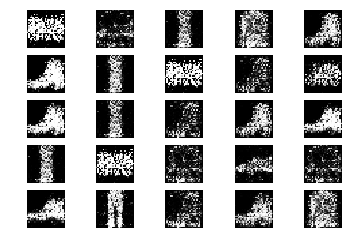

4001 [D loss: 0.443228, acc.: 79.69%] [G loss: 1.785650]
4002 [D loss: 0.472631, acc.: 71.88%] [G loss: 1.536335]
4003 [D loss: 0.569606, acc.: 78.12%] [G loss: 1.609166]
4004 [D loss: 0.430072, acc.: 79.69%] [G loss: 1.606906]
4005 [D loss: 0.487900, acc.: 76.56%] [G loss: 1.716082]
4006 [D loss: 0.565602, acc.: 60.94%] [G loss: 1.730849]
4007 [D loss: 0.671770, acc.: 71.88%] [G loss: 1.301186]
4008 [D loss: 0.548951, acc.: 75.00%] [G loss: 1.238482]
4009 [D loss: 0.506912, acc.: 73.44%] [G loss: 1.161203]
4010 [D loss: 0.624183, acc.: 62.50%] [G loss: 1.165441]
4011 [D loss: 0.480379, acc.: 78.12%] [G loss: 1.300839]
4012 [D loss: 0.483189, acc.: 78.12%] [G loss: 1.353342]
4013 [D loss: 0.460620, acc.: 82.81%] [G loss: 1.492029]
4014 [D loss: 0.503789, acc.: 78.12%] [G loss: 1.440641]
4015 [D loss: 0.511688, acc.: 75.00%] [G loss: 1.325666]
4016 [D loss: 0.551833, acc.: 75.00%] [G loss: 1.330039]
4017 [D loss: 0.468992, acc.: 78.12%] [G loss: 1.320200]
4018 [D loss: 0.445087, acc.: 7

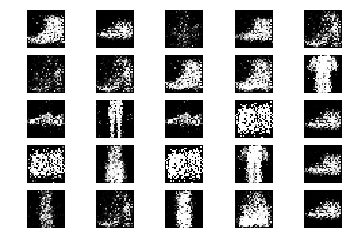

4201 [D loss: 0.470144, acc.: 79.69%] [G loss: 1.372727]
4202 [D loss: 0.498992, acc.: 71.88%] [G loss: 1.461473]
4203 [D loss: 0.550977, acc.: 67.19%] [G loss: 1.429554]
4204 [D loss: 0.381696, acc.: 84.38%] [G loss: 1.540395]
4205 [D loss: 0.467009, acc.: 78.12%] [G loss: 1.446086]
4206 [D loss: 0.530778, acc.: 71.88%] [G loss: 1.522526]
4207 [D loss: 0.369607, acc.: 82.81%] [G loss: 1.760716]
4208 [D loss: 0.455614, acc.: 76.56%] [G loss: 1.961168]
4209 [D loss: 0.590470, acc.: 71.88%] [G loss: 1.641096]
4210 [D loss: 0.395454, acc.: 82.81%] [G loss: 1.698484]
4211 [D loss: 0.405308, acc.: 82.81%] [G loss: 1.803777]
4212 [D loss: 0.410920, acc.: 81.25%] [G loss: 1.642155]
4213 [D loss: 0.475174, acc.: 76.56%] [G loss: 1.559964]
4214 [D loss: 0.389228, acc.: 82.81%] [G loss: 1.658134]
4215 [D loss: 0.409597, acc.: 78.12%] [G loss: 1.722606]
4216 [D loss: 0.568054, acc.: 68.75%] [G loss: 1.744822]
4217 [D loss: 0.475285, acc.: 79.69%] [G loss: 1.527195]
4218 [D loss: 0.441228, acc.: 7

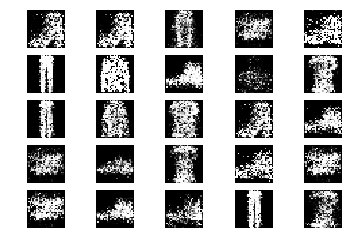

4401 [D loss: 0.577933, acc.: 65.62%] [G loss: 1.591028]
4402 [D loss: 0.495640, acc.: 81.25%] [G loss: 1.615071]
4403 [D loss: 0.505295, acc.: 76.56%] [G loss: 1.576781]
4404 [D loss: 0.559843, acc.: 70.31%] [G loss: 1.443558]
4405 [D loss: 0.576651, acc.: 67.19%] [G loss: 1.408362]
4406 [D loss: 0.550111, acc.: 73.44%] [G loss: 1.575983]
4407 [D loss: 0.511859, acc.: 71.88%] [G loss: 1.547837]
4408 [D loss: 0.461352, acc.: 82.81%] [G loss: 1.566485]
4409 [D loss: 0.519373, acc.: 73.44%] [G loss: 1.635358]
4410 [D loss: 0.492197, acc.: 75.00%] [G loss: 1.525852]
4411 [D loss: 0.477894, acc.: 73.44%] [G loss: 1.518853]
4412 [D loss: 0.353987, acc.: 81.25%] [G loss: 1.657345]
4413 [D loss: 0.381172, acc.: 85.94%] [G loss: 1.590777]
4414 [D loss: 0.393361, acc.: 81.25%] [G loss: 1.511088]
4415 [D loss: 0.527335, acc.: 68.75%] [G loss: 1.641130]
4416 [D loss: 0.564117, acc.: 70.31%] [G loss: 1.459875]
4417 [D loss: 0.696302, acc.: 53.12%] [G loss: 1.330697]
4418 [D loss: 0.613482, acc.: 5

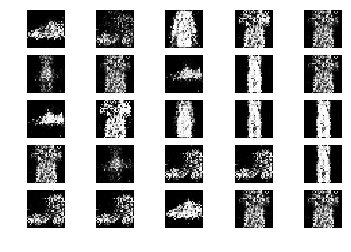

4601 [D loss: 0.614206, acc.: 64.06%] [G loss: 1.158155]
4602 [D loss: 0.498581, acc.: 73.44%] [G loss: 1.248101]
4603 [D loss: 0.525229, acc.: 73.44%] [G loss: 1.258148]
4604 [D loss: 0.504726, acc.: 73.44%] [G loss: 1.150454]
4605 [D loss: 0.522340, acc.: 68.75%] [G loss: 1.110738]
4606 [D loss: 0.490996, acc.: 73.44%] [G loss: 1.108447]
4607 [D loss: 0.453445, acc.: 78.12%] [G loss: 1.265645]
4608 [D loss: 0.522618, acc.: 73.44%] [G loss: 1.297362]
4609 [D loss: 0.498773, acc.: 76.56%] [G loss: 1.198286]
4610 [D loss: 0.611571, acc.: 71.88%] [G loss: 1.266912]
4611 [D loss: 0.404066, acc.: 79.69%] [G loss: 1.320157]
4612 [D loss: 0.498777, acc.: 78.12%] [G loss: 1.367096]
4613 [D loss: 0.535646, acc.: 75.00%] [G loss: 1.353301]
4614 [D loss: 0.358420, acc.: 89.06%] [G loss: 1.352379]
4615 [D loss: 0.405770, acc.: 79.69%] [G loss: 1.397498]
4616 [D loss: 0.488248, acc.: 78.12%] [G loss: 1.540546]
4617 [D loss: 0.380681, acc.: 81.25%] [G loss: 1.524370]
4618 [D loss: 0.502450, acc.: 7

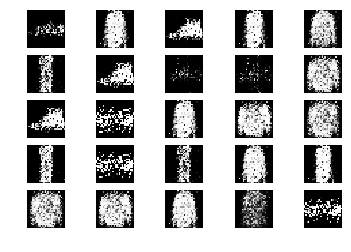

4801 [D loss: 0.581745, acc.: 70.31%] [G loss: 1.380608]
4802 [D loss: 0.435585, acc.: 79.69%] [G loss: 1.318456]
4803 [D loss: 0.446625, acc.: 84.38%] [G loss: 1.544935]
4804 [D loss: 0.602317, acc.: 73.44%] [G loss: 1.571157]
4805 [D loss: 0.543926, acc.: 70.31%] [G loss: 1.391002]
4806 [D loss: 0.459372, acc.: 79.69%] [G loss: 1.377984]
4807 [D loss: 0.422835, acc.: 81.25%] [G loss: 1.341142]
4808 [D loss: 0.521512, acc.: 73.44%] [G loss: 1.285514]
4809 [D loss: 0.539327, acc.: 73.44%] [G loss: 1.446564]
4810 [D loss: 0.407696, acc.: 84.38%] [G loss: 1.516720]
4811 [D loss: 0.491260, acc.: 73.44%] [G loss: 1.754812]
4812 [D loss: 0.483373, acc.: 82.81%] [G loss: 1.531069]
4813 [D loss: 0.479801, acc.: 76.56%] [G loss: 1.404395]
4814 [D loss: 0.418482, acc.: 82.81%] [G loss: 1.791756]
4815 [D loss: 0.773669, acc.: 56.25%] [G loss: 1.185474]
4816 [D loss: 0.710970, acc.: 56.25%] [G loss: 1.257922]
4817 [D loss: 0.484560, acc.: 73.44%] [G loss: 1.663858]
4818 [D loss: 0.652845, acc.: 7

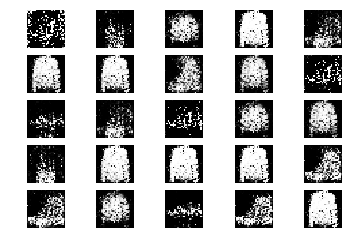

5001 [D loss: 0.397863, acc.: 78.12%] [G loss: 2.479830]
5002 [D loss: 0.413317, acc.: 82.81%] [G loss: 2.531215]
5003 [D loss: 0.337991, acc.: 87.50%] [G loss: 2.231441]
5004 [D loss: 0.524064, acc.: 79.69%] [G loss: 1.634952]
5005 [D loss: 0.345816, acc.: 84.38%] [G loss: 1.450717]
5006 [D loss: 0.330499, acc.: 85.94%] [G loss: 1.467824]
5007 [D loss: 0.316244, acc.: 84.38%] [G loss: 1.569062]
5008 [D loss: 0.342490, acc.: 82.81%] [G loss: 1.815507]
5009 [D loss: 0.356774, acc.: 87.50%] [G loss: 1.778963]
5010 [D loss: 0.418464, acc.: 76.56%] [G loss: 1.666457]
5011 [D loss: 0.390884, acc.: 75.00%] [G loss: 1.582474]
5012 [D loss: 0.318015, acc.: 84.38%] [G loss: 2.006696]
5013 [D loss: 0.361398, acc.: 82.81%] [G loss: 2.122864]
5014 [D loss: 0.311459, acc.: 90.62%] [G loss: 2.044995]
5015 [D loss: 0.370689, acc.: 85.94%] [G loss: 2.262851]
5016 [D loss: 0.281652, acc.: 92.19%] [G loss: 2.175460]
5017 [D loss: 0.382260, acc.: 81.25%] [G loss: 1.669629]
5018 [D loss: 0.629175, acc.: 7

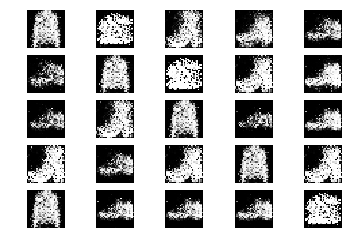

5201 [D loss: 0.506261, acc.: 73.44%] [G loss: 1.891985]
5202 [D loss: 0.601848, acc.: 71.88%] [G loss: 1.882288]
5203 [D loss: 0.557692, acc.: 75.00%] [G loss: 1.619701]
5204 [D loss: 0.420079, acc.: 81.25%] [G loss: 1.541145]
5205 [D loss: 0.473427, acc.: 71.88%] [G loss: 1.595366]
5206 [D loss: 0.243408, acc.: 96.88%] [G loss: 1.637727]
5207 [D loss: 0.756910, acc.: 75.00%] [G loss: 1.727705]
5208 [D loss: 0.365955, acc.: 84.38%] [G loss: 1.684839]
5209 [D loss: 0.412409, acc.: 78.12%] [G loss: 1.761717]
5210 [D loss: 0.340538, acc.: 82.81%] [G loss: 1.753274]
5211 [D loss: 0.321948, acc.: 84.38%] [G loss: 2.065400]
5212 [D loss: 0.258117, acc.: 84.38%] [G loss: 2.294230]
5213 [D loss: 0.189931, acc.: 89.06%] [G loss: 2.570014]
5214 [D loss: 0.422038, acc.: 75.00%] [G loss: 2.148702]
5215 [D loss: 0.484065, acc.: 79.69%] [G loss: 2.247941]
5216 [D loss: 0.542943, acc.: 75.00%] [G loss: 2.328543]
5217 [D loss: 0.354959, acc.: 76.56%] [G loss: 2.131679]
5218 [D loss: 0.429596, acc.: 7

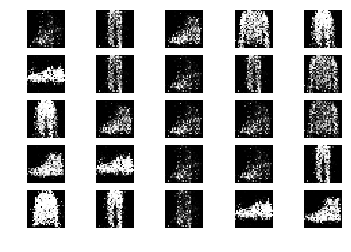

5401 [D loss: 0.327241, acc.: 85.94%] [G loss: 2.042734]
5402 [D loss: 0.482479, acc.: 79.69%] [G loss: 1.875859]
5403 [D loss: 0.415747, acc.: 81.25%] [G loss: 1.922225]
5404 [D loss: 0.384038, acc.: 84.38%] [G loss: 1.983705]
5405 [D loss: 0.476355, acc.: 81.25%] [G loss: 1.724551]
5406 [D loss: 0.374193, acc.: 84.38%] [G loss: 1.848507]
5407 [D loss: 0.342394, acc.: 87.50%] [G loss: 1.814430]
5408 [D loss: 0.346317, acc.: 84.38%] [G loss: 1.853296]
5409 [D loss: 0.273104, acc.: 87.50%] [G loss: 2.063625]
5410 [D loss: 0.444192, acc.: 82.81%] [G loss: 1.907946]
5411 [D loss: 0.333391, acc.: 82.81%] [G loss: 1.694273]
5412 [D loss: 0.414002, acc.: 89.06%] [G loss: 2.234855]
5413 [D loss: 0.396652, acc.: 84.38%] [G loss: 2.179091]
5414 [D loss: 0.421131, acc.: 85.94%] [G loss: 1.930770]
5415 [D loss: 0.500863, acc.: 68.75%] [G loss: 1.933389]
5416 [D loss: 0.435531, acc.: 82.81%] [G loss: 1.885050]
5417 [D loss: 0.273789, acc.: 90.62%] [G loss: 1.935155]
5418 [D loss: 0.486937, acc.: 7

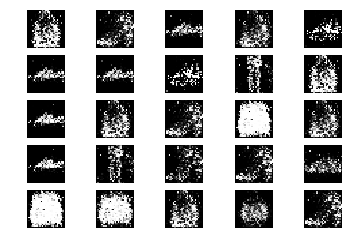

5601 [D loss: 0.210328, acc.: 95.31%] [G loss: 2.454991]
5602 [D loss: 0.280821, acc.: 92.19%] [G loss: 2.339707]
5603 [D loss: 0.201422, acc.: 92.19%] [G loss: 2.398033]
5604 [D loss: 0.164370, acc.: 96.88%] [G loss: 2.549551]
5605 [D loss: 0.329267, acc.: 87.50%] [G loss: 2.786698]
5606 [D loss: 0.460737, acc.: 85.94%] [G loss: 2.143680]
5607 [D loss: 0.333208, acc.: 87.50%] [G loss: 2.013631]
5608 [D loss: 0.343756, acc.: 85.94%] [G loss: 2.053665]
5609 [D loss: 0.249360, acc.: 90.62%] [G loss: 2.267668]
5610 [D loss: 0.069607, acc.: 100.00%] [G loss: 2.507177]
5611 [D loss: 0.117213, acc.: 95.31%] [G loss: 2.762702]
5612 [D loss: 0.232652, acc.: 92.19%] [G loss: 2.556048]
5613 [D loss: 0.206194, acc.: 89.06%] [G loss: 2.405957]
5614 [D loss: 0.126307, acc.: 92.19%] [G loss: 2.367381]
5615 [D loss: 0.475146, acc.: 84.38%] [G loss: 2.820105]
5616 [D loss: 0.267826, acc.: 92.19%] [G loss: 2.625071]
5617 [D loss: 0.425450, acc.: 85.94%] [G loss: 2.408628]
5618 [D loss: 0.488336, acc.: 

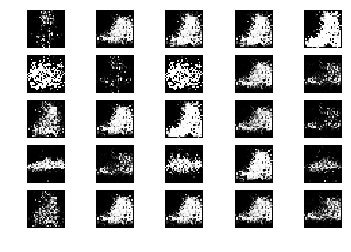

5801 [D loss: 0.400269, acc.: 76.56%] [G loss: 1.646556]
5802 [D loss: 0.373152, acc.: 84.38%] [G loss: 1.636340]
5803 [D loss: 0.365810, acc.: 79.69%] [G loss: 1.788152]
5804 [D loss: 0.426350, acc.: 82.81%] [G loss: 1.829089]
5805 [D loss: 0.492602, acc.: 81.25%] [G loss: 1.474344]
5806 [D loss: 0.389702, acc.: 82.81%] [G loss: 1.518129]
5807 [D loss: 0.456701, acc.: 79.69%] [G loss: 1.470392]
5808 [D loss: 0.454338, acc.: 79.69%] [G loss: 1.510741]
5809 [D loss: 0.416633, acc.: 81.25%] [G loss: 1.465819]
5810 [D loss: 0.498646, acc.: 71.88%] [G loss: 1.390062]
5811 [D loss: 0.358561, acc.: 84.38%] [G loss: 1.373689]
5812 [D loss: 0.421949, acc.: 82.81%] [G loss: 1.333969]
5813 [D loss: 0.298676, acc.: 87.50%] [G loss: 1.517627]
5814 [D loss: 0.378155, acc.: 84.38%] [G loss: 1.655607]
5815 [D loss: 0.319524, acc.: 84.38%] [G loss: 1.629253]
5816 [D loss: 0.370978, acc.: 79.69%] [G loss: 1.581551]
5817 [D loss: 0.468083, acc.: 67.19%] [G loss: 1.521386]
5818 [D loss: 0.353231, acc.: 8

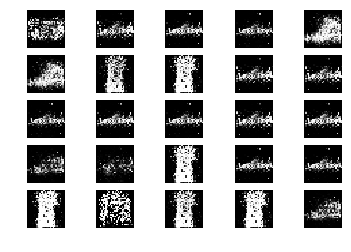

6001 [D loss: 0.444973, acc.: 78.12%] [G loss: 1.716403]
6002 [D loss: 0.426070, acc.: 81.25%] [G loss: 1.657460]
6003 [D loss: 0.425636, acc.: 82.81%] [G loss: 1.556664]
6004 [D loss: 0.561203, acc.: 70.31%] [G loss: 1.630719]
6005 [D loss: 0.325407, acc.: 85.94%] [G loss: 1.663557]
6006 [D loss: 0.425656, acc.: 81.25%] [G loss: 1.448514]
6007 [D loss: 0.513094, acc.: 67.19%] [G loss: 1.372849]
6008 [D loss: 0.475535, acc.: 79.69%] [G loss: 1.453948]
6009 [D loss: 0.397032, acc.: 82.81%] [G loss: 1.578381]
6010 [D loss: 0.376867, acc.: 89.06%] [G loss: 1.536054]
6011 [D loss: 0.332274, acc.: 84.38%] [G loss: 1.507002]
6012 [D loss: 0.219019, acc.: 95.31%] [G loss: 1.799631]
6013 [D loss: 0.366399, acc.: 84.38%] [G loss: 1.813392]
6014 [D loss: 0.452298, acc.: 79.69%] [G loss: 1.758121]
6015 [D loss: 0.611718, acc.: 73.44%] [G loss: 1.879652]
6016 [D loss: 0.417738, acc.: 78.12%] [G loss: 1.835063]
6017 [D loss: 0.574934, acc.: 75.00%] [G loss: 1.321327]
6018 [D loss: 0.769059, acc.: 5

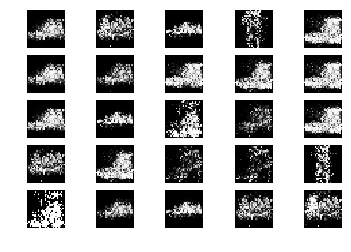

6201 [D loss: 0.430881, acc.: 78.12%] [G loss: 1.621567]
6202 [D loss: 0.523901, acc.: 73.44%] [G loss: 1.547827]
6203 [D loss: 0.388936, acc.: 82.81%] [G loss: 1.530790]
6204 [D loss: 0.309453, acc.: 87.50%] [G loss: 1.591250]
6205 [D loss: 0.488097, acc.: 78.12%] [G loss: 1.569352]
6206 [D loss: 0.435228, acc.: 79.69%] [G loss: 1.551942]
6207 [D loss: 0.390638, acc.: 81.25%] [G loss: 1.597709]
6208 [D loss: 0.443367, acc.: 78.12%] [G loss: 1.463425]
6209 [D loss: 0.255214, acc.: 92.19%] [G loss: 1.486625]
6210 [D loss: 0.369925, acc.: 82.81%] [G loss: 1.640234]
6211 [D loss: 0.367573, acc.: 84.38%] [G loss: 1.708829]
6212 [D loss: 0.507901, acc.: 71.88%] [G loss: 1.677103]
6213 [D loss: 0.375346, acc.: 85.94%] [G loss: 1.572364]
6214 [D loss: 0.524162, acc.: 73.44%] [G loss: 1.589428]
6215 [D loss: 0.396058, acc.: 84.38%] [G loss: 1.536451]
6216 [D loss: 0.397405, acc.: 82.81%] [G loss: 1.427192]
6217 [D loss: 0.307033, acc.: 89.06%] [G loss: 1.430690]
6218 [D loss: 0.422237, acc.: 7

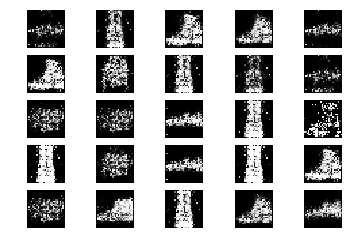

6401 [D loss: 0.378140, acc.: 82.81%] [G loss: 1.496640]
6402 [D loss: 0.468776, acc.: 76.56%] [G loss: 1.522074]
6403 [D loss: 0.496186, acc.: 71.88%] [G loss: 1.438206]
6404 [D loss: 0.447555, acc.: 81.25%] [G loss: 1.485366]
6405 [D loss: 0.371034, acc.: 84.38%] [G loss: 1.577032]
6406 [D loss: 0.518400, acc.: 75.00%] [G loss: 1.387580]
6407 [D loss: 0.357398, acc.: 85.94%] [G loss: 1.259090]
6408 [D loss: 0.453356, acc.: 76.56%] [G loss: 1.227949]
6409 [D loss: 0.458938, acc.: 81.25%] [G loss: 1.381008]
6410 [D loss: 0.425377, acc.: 82.81%] [G loss: 1.377022]
6411 [D loss: 0.397166, acc.: 85.94%] [G loss: 1.291329]
6412 [D loss: 0.261870, acc.: 92.19%] [G loss: 1.371585]
6413 [D loss: 0.426050, acc.: 82.81%] [G loss: 1.375501]
6414 [D loss: 0.586461, acc.: 67.19%] [G loss: 1.375869]
6415 [D loss: 0.403647, acc.: 82.81%] [G loss: 1.375447]
6416 [D loss: 0.409496, acc.: 82.81%] [G loss: 1.329992]
6417 [D loss: 0.447462, acc.: 76.56%] [G loss: 1.285087]
6418 [D loss: 0.633683, acc.: 7

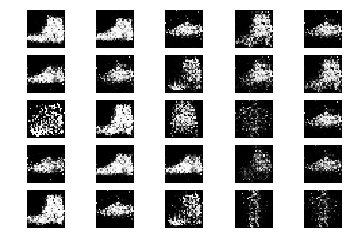

6601 [D loss: 0.367377, acc.: 82.81%] [G loss: 1.325675]
6602 [D loss: 0.380205, acc.: 81.25%] [G loss: 1.366971]
6603 [D loss: 0.320423, acc.: 89.06%] [G loss: 1.326585]
6604 [D loss: 0.445507, acc.: 71.88%] [G loss: 1.459740]
6605 [D loss: 0.427286, acc.: 81.25%] [G loss: 1.448630]
6606 [D loss: 0.371750, acc.: 84.38%] [G loss: 1.441909]
6607 [D loss: 0.365309, acc.: 82.81%] [G loss: 1.419799]
6608 [D loss: 0.336726, acc.: 85.94%] [G loss: 1.405404]
6609 [D loss: 0.352298, acc.: 85.94%] [G loss: 1.306485]
6610 [D loss: 0.558911, acc.: 75.00%] [G loss: 1.528696]
6611 [D loss: 0.430855, acc.: 79.69%] [G loss: 1.641305]
6612 [D loss: 0.458732, acc.: 76.56%] [G loss: 1.542441]
6613 [D loss: 0.288572, acc.: 89.06%] [G loss: 1.494786]
6614 [D loss: 0.392650, acc.: 84.38%] [G loss: 1.425747]
6615 [D loss: 0.423093, acc.: 79.69%] [G loss: 1.341556]
6616 [D loss: 0.393713, acc.: 82.81%] [G loss: 1.289655]
6617 [D loss: 0.442744, acc.: 75.00%] [G loss: 1.356512]
6618 [D loss: 0.387376, acc.: 8

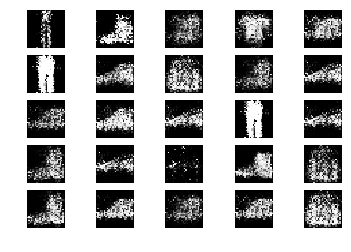

6801 [D loss: 0.564846, acc.: 70.31%] [G loss: 1.195475]
6802 [D loss: 0.449991, acc.: 73.44%] [G loss: 1.190230]
6803 [D loss: 0.615813, acc.: 73.44%] [G loss: 1.310262]
6804 [D loss: 0.495048, acc.: 71.88%] [G loss: 1.263680]
6805 [D loss: 0.587060, acc.: 70.31%] [G loss: 1.305419]
6806 [D loss: 0.558900, acc.: 68.75%] [G loss: 1.285381]
6807 [D loss: 0.556626, acc.: 70.31%] [G loss: 1.251312]
6808 [D loss: 0.500646, acc.: 75.00%] [G loss: 1.250078]
6809 [D loss: 0.535016, acc.: 73.44%] [G loss: 1.311837]
6810 [D loss: 0.535153, acc.: 70.31%] [G loss: 1.238002]
6811 [D loss: 0.580599, acc.: 64.06%] [G loss: 1.446956]
6812 [D loss: 0.454718, acc.: 79.69%] [G loss: 1.516684]
6813 [D loss: 0.409107, acc.: 84.38%] [G loss: 1.504555]
6814 [D loss: 0.522830, acc.: 71.88%] [G loss: 1.453482]
6815 [D loss: 0.449758, acc.: 82.81%] [G loss: 1.316971]
6816 [D loss: 0.440324, acc.: 79.69%] [G loss: 1.371043]
6817 [D loss: 0.507510, acc.: 76.56%] [G loss: 1.322948]
6818 [D loss: 0.529161, acc.: 7

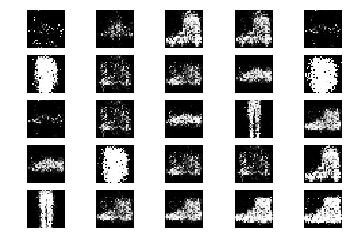

7001 [D loss: 0.510085, acc.: 78.12%] [G loss: 1.680622]
7002 [D loss: 0.529612, acc.: 70.31%] [G loss: 1.489861]
7003 [D loss: 0.534766, acc.: 76.56%] [G loss: 1.191604]
7004 [D loss: 0.411574, acc.: 75.00%] [G loss: 1.338607]
7005 [D loss: 0.403581, acc.: 76.56%] [G loss: 1.287337]
7006 [D loss: 0.621744, acc.: 59.38%] [G loss: 1.353757]
7007 [D loss: 0.342484, acc.: 87.50%] [G loss: 1.644164]
7008 [D loss: 0.400367, acc.: 79.69%] [G loss: 1.683044]
7009 [D loss: 0.592042, acc.: 67.19%] [G loss: 1.377291]
7010 [D loss: 0.450798, acc.: 70.31%] [G loss: 1.490559]
7011 [D loss: 0.358782, acc.: 84.38%] [G loss: 1.635429]
7012 [D loss: 0.354493, acc.: 85.94%] [G loss: 1.606184]
7013 [D loss: 0.405013, acc.: 82.81%] [G loss: 1.625056]
7014 [D loss: 0.318127, acc.: 89.06%] [G loss: 1.553715]
7015 [D loss: 0.463444, acc.: 78.12%] [G loss: 1.595406]
7016 [D loss: 0.496868, acc.: 76.56%] [G loss: 1.435480]
7017 [D loss: 0.406773, acc.: 85.94%] [G loss: 1.455535]
7018 [D loss: 0.442707, acc.: 8

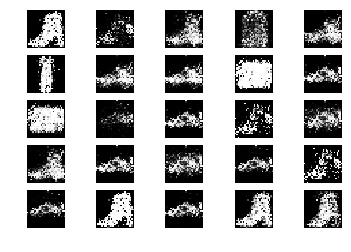

7201 [D loss: 0.454581, acc.: 78.12%] [G loss: 1.505059]
7202 [D loss: 0.369741, acc.: 82.81%] [G loss: 1.493657]
7203 [D loss: 0.464925, acc.: 78.12%] [G loss: 1.507849]
7204 [D loss: 0.459493, acc.: 79.69%] [G loss: 1.455381]
7205 [D loss: 0.549616, acc.: 71.88%] [G loss: 1.328293]
7206 [D loss: 0.420290, acc.: 82.81%] [G loss: 1.405823]
7207 [D loss: 0.426353, acc.: 81.25%] [G loss: 1.461705]
7208 [D loss: 0.335086, acc.: 85.94%] [G loss: 1.561376]
7209 [D loss: 0.565095, acc.: 75.00%] [G loss: 1.527628]
7210 [D loss: 0.411630, acc.: 82.81%] [G loss: 1.321101]
7211 [D loss: 0.418453, acc.: 78.12%] [G loss: 1.391561]
7212 [D loss: 0.499552, acc.: 68.75%] [G loss: 1.332065]
7213 [D loss: 0.495825, acc.: 84.38%] [G loss: 1.416257]
7214 [D loss: 0.431917, acc.: 78.12%] [G loss: 1.357589]
7215 [D loss: 0.526169, acc.: 71.88%] [G loss: 1.526299]
7216 [D loss: 0.565082, acc.: 68.75%] [G loss: 1.545664]
7217 [D loss: 0.491214, acc.: 76.56%] [G loss: 1.509727]
7218 [D loss: 0.433922, acc.: 7

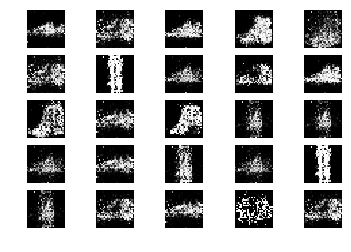

7401 [D loss: 0.469549, acc.: 76.56%] [G loss: 1.454724]
7402 [D loss: 0.489179, acc.: 76.56%] [G loss: 1.364970]
7403 [D loss: 0.578642, acc.: 70.31%] [G loss: 1.268051]
7404 [D loss: 0.443596, acc.: 79.69%] [G loss: 1.289752]
7405 [D loss: 0.505061, acc.: 76.56%] [G loss: 1.298593]
7406 [D loss: 0.446773, acc.: 81.25%] [G loss: 1.406249]
7407 [D loss: 0.561964, acc.: 70.31%] [G loss: 1.729012]
7408 [D loss: 0.507619, acc.: 73.44%] [G loss: 1.567493]
7409 [D loss: 0.342025, acc.: 87.50%] [G loss: 1.507568]
7410 [D loss: 0.394496, acc.: 84.38%] [G loss: 1.412159]
7411 [D loss: 0.443114, acc.: 79.69%] [G loss: 1.453289]
7412 [D loss: 0.581389, acc.: 67.19%] [G loss: 1.548557]
7413 [D loss: 0.502159, acc.: 76.56%] [G loss: 1.375407]
7414 [D loss: 0.453438, acc.: 81.25%] [G loss: 1.341874]
7415 [D loss: 0.429676, acc.: 81.25%] [G loss: 1.279556]
7416 [D loss: 0.385507, acc.: 84.38%] [G loss: 1.298425]
7417 [D loss: 0.362928, acc.: 85.94%] [G loss: 1.344010]
7418 [D loss: 0.536035, acc.: 7

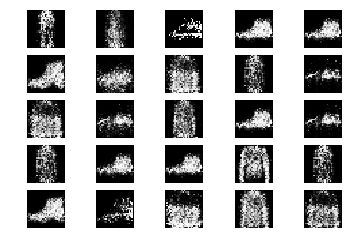

7601 [D loss: 0.509534, acc.: 76.56%] [G loss: 1.434192]
7602 [D loss: 0.557572, acc.: 73.44%] [G loss: 1.230606]
7603 [D loss: 0.546793, acc.: 67.19%] [G loss: 1.396641]
7604 [D loss: 0.455072, acc.: 81.25%] [G loss: 1.314820]
7605 [D loss: 0.504797, acc.: 68.75%] [G loss: 1.250677]
7606 [D loss: 0.659730, acc.: 56.25%] [G loss: 1.099588]
7607 [D loss: 0.473516, acc.: 76.56%] [G loss: 1.298400]
7608 [D loss: 0.428837, acc.: 76.56%] [G loss: 1.388144]
7609 [D loss: 0.513278, acc.: 76.56%] [G loss: 1.488167]
7610 [D loss: 0.490647, acc.: 79.69%] [G loss: 1.439621]
7611 [D loss: 0.516641, acc.: 78.12%] [G loss: 1.334198]
7612 [D loss: 0.700409, acc.: 78.12%] [G loss: 1.552274]
7613 [D loss: 0.608649, acc.: 64.06%] [G loss: 1.498244]
7614 [D loss: 0.520788, acc.: 76.56%] [G loss: 1.503286]
7615 [D loss: 0.617624, acc.: 67.19%] [G loss: 1.362267]
7616 [D loss: 0.636800, acc.: 62.50%] [G loss: 1.349383]
7617 [D loss: 0.598134, acc.: 67.19%] [G loss: 1.353697]
7618 [D loss: 0.660056, acc.: 6

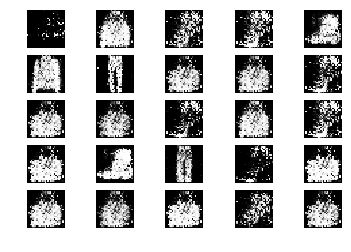

7801 [D loss: 0.496803, acc.: 67.19%] [G loss: 1.930557]
7802 [D loss: 0.372738, acc.: 90.62%] [G loss: 1.963587]
7803 [D loss: 0.659319, acc.: 67.19%] [G loss: 1.583112]
7804 [D loss: 0.262470, acc.: 95.31%] [G loss: 1.652927]
7805 [D loss: 0.257332, acc.: 92.19%] [G loss: 1.812603]
7806 [D loss: 0.222661, acc.: 89.06%] [G loss: 2.068760]
7807 [D loss: 0.261401, acc.: 85.94%] [G loss: 2.046175]
7808 [D loss: 0.260081, acc.: 84.38%] [G loss: 2.402700]
7809 [D loss: 0.323422, acc.: 81.25%] [G loss: 2.513474]
7810 [D loss: 0.279734, acc.: 90.62%] [G loss: 2.578447]
7811 [D loss: 0.448101, acc.: 79.69%] [G loss: 3.420716]
7812 [D loss: 0.407394, acc.: 85.94%] [G loss: 2.275767]
7813 [D loss: 0.429179, acc.: 82.81%] [G loss: 2.097725]
7814 [D loss: 0.351755, acc.: 81.25%] [G loss: 1.925612]
7815 [D loss: 0.581809, acc.: 68.75%] [G loss: 1.938675]
7816 [D loss: 0.449142, acc.: 75.00%] [G loss: 1.651217]
7817 [D loss: 0.426158, acc.: 79.69%] [G loss: 1.718381]
7818 [D loss: 0.225094, acc.: 9

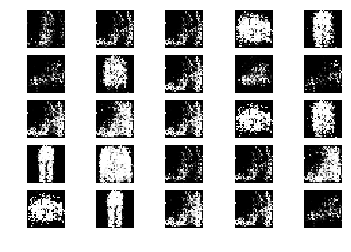

8001 [D loss: 0.239011, acc.: 89.06%] [G loss: 2.336850]
8002 [D loss: 0.183081, acc.: 90.62%] [G loss: 2.478845]
8003 [D loss: 0.261595, acc.: 87.50%] [G loss: 2.568351]
8004 [D loss: 0.525172, acc.: 65.62%] [G loss: 2.544107]
8005 [D loss: 0.411782, acc.: 76.56%] [G loss: 2.786124]
8006 [D loss: 0.333765, acc.: 84.38%] [G loss: 2.701004]
8007 [D loss: 0.374847, acc.: 87.50%] [G loss: 2.094111]
8008 [D loss: 0.258843, acc.: 95.31%] [G loss: 2.158099]
8009 [D loss: 0.730680, acc.: 62.50%] [G loss: 2.086294]
8010 [D loss: 0.437579, acc.: 73.44%] [G loss: 1.761958]
8011 [D loss: 0.399805, acc.: 84.38%] [G loss: 2.067869]
8012 [D loss: 0.384606, acc.: 85.94%] [G loss: 1.942010]
8013 [D loss: 0.336962, acc.: 87.50%] [G loss: 2.052144]
8014 [D loss: 0.324206, acc.: 87.50%] [G loss: 2.214103]
8015 [D loss: 0.232588, acc.: 90.62%] [G loss: 2.079832]
8016 [D loss: 0.292213, acc.: 87.50%] [G loss: 1.940596]
8017 [D loss: 0.388755, acc.: 85.94%] [G loss: 1.923607]
8018 [D loss: 0.191147, acc.: 9

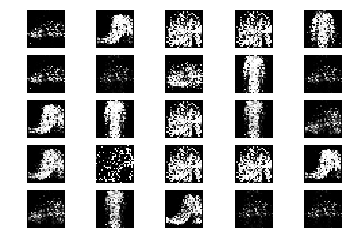

8201 [D loss: 0.463729, acc.: 84.38%] [G loss: 1.946733]
8202 [D loss: 0.134192, acc.: 100.00%] [G loss: 1.991187]
8203 [D loss: 0.320780, acc.: 87.50%] [G loss: 2.012123]
8204 [D loss: 0.154113, acc.: 96.88%] [G loss: 2.107760]
8205 [D loss: 0.298452, acc.: 85.94%] [G loss: 2.253748]
8206 [D loss: 0.269020, acc.: 89.06%] [G loss: 2.235347]
8207 [D loss: 0.560578, acc.: 79.69%] [G loss: 2.011593]
8208 [D loss: 0.268444, acc.: 93.75%] [G loss: 2.122165]
8209 [D loss: 0.294437, acc.: 89.06%] [G loss: 1.947261]
8210 [D loss: 0.474709, acc.: 75.00%] [G loss: 1.646497]
8211 [D loss: 0.641826, acc.: 64.06%] [G loss: 1.842553]
8212 [D loss: 0.547943, acc.: 71.88%] [G loss: 1.620013]
8213 [D loss: 0.466918, acc.: 75.00%] [G loss: 1.576500]
8214 [D loss: 0.428026, acc.: 79.69%] [G loss: 1.631768]
8215 [D loss: 0.537920, acc.: 71.88%] [G loss: 1.666032]
8216 [D loss: 0.365879, acc.: 82.81%] [G loss: 1.639156]
8217 [D loss: 0.360642, acc.: 84.38%] [G loss: 1.681701]
8218 [D loss: 0.363298, acc.: 

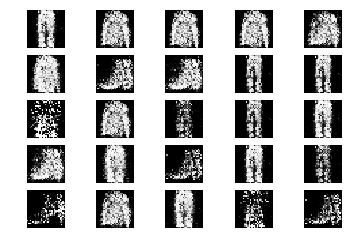

8401 [D loss: 0.376914, acc.: 81.25%] [G loss: 1.773261]
8402 [D loss: 0.604884, acc.: 73.44%] [G loss: 1.751477]
8403 [D loss: 0.450622, acc.: 79.69%] [G loss: 1.489263]
8404 [D loss: 0.638025, acc.: 71.88%] [G loss: 1.793225]
8405 [D loss: 0.469709, acc.: 79.69%] [G loss: 1.827182]
8406 [D loss: 0.426851, acc.: 79.69%] [G loss: 1.723040]
8407 [D loss: 0.488525, acc.: 73.44%] [G loss: 1.261913]
8408 [D loss: 0.445453, acc.: 84.38%] [G loss: 1.484080]
8409 [D loss: 0.476296, acc.: 75.00%] [G loss: 1.510195]
8410 [D loss: 0.430511, acc.: 75.00%] [G loss: 1.521999]
8411 [D loss: 0.418639, acc.: 79.69%] [G loss: 1.428484]
8412 [D loss: 0.586395, acc.: 64.06%] [G loss: 1.698479]
8413 [D loss: 0.579890, acc.: 64.06%] [G loss: 1.545886]
8414 [D loss: 0.465982, acc.: 76.56%] [G loss: 1.677062]
8415 [D loss: 0.549760, acc.: 67.19%] [G loss: 1.588748]
8416 [D loss: 0.514674, acc.: 76.56%] [G loss: 1.524329]
8417 [D loss: 0.421435, acc.: 78.12%] [G loss: 1.480916]
8418 [D loss: 0.461817, acc.: 7

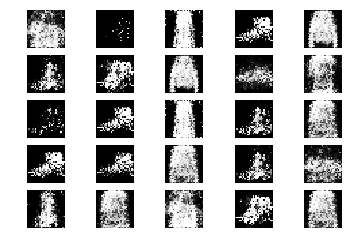

8601 [D loss: 0.923212, acc.: 71.88%] [G loss: 1.034294]
8602 [D loss: 0.644639, acc.: 60.94%] [G loss: 1.067692]
8603 [D loss: 0.573510, acc.: 68.75%] [G loss: 1.123158]
8604 [D loss: 0.634148, acc.: 65.62%] [G loss: 1.064373]
8605 [D loss: 0.687612, acc.: 57.81%] [G loss: 1.069454]
8606 [D loss: 0.637804, acc.: 64.06%] [G loss: 1.206184]
8607 [D loss: 0.560586, acc.: 71.88%] [G loss: 1.148241]
8608 [D loss: 0.624666, acc.: 67.19%] [G loss: 1.150929]
8609 [D loss: 0.581753, acc.: 67.19%] [G loss: 1.246068]
8610 [D loss: 0.677497, acc.: 54.69%] [G loss: 1.312905]
8611 [D loss: 0.575884, acc.: 76.56%] [G loss: 1.183374]
8612 [D loss: 0.622228, acc.: 67.19%] [G loss: 1.309264]
8613 [D loss: 0.633446, acc.: 65.62%] [G loss: 1.383563]
8614 [D loss: 0.566430, acc.: 68.75%] [G loss: 1.360070]
8615 [D loss: 0.669437, acc.: 64.06%] [G loss: 1.340001]
8616 [D loss: 0.600542, acc.: 68.75%] [G loss: 1.140459]
8617 [D loss: 0.582690, acc.: 70.31%] [G loss: 1.244408]
8618 [D loss: 0.586163, acc.: 5

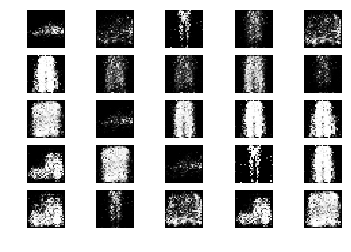

8801 [D loss: 0.527837, acc.: 70.31%] [G loss: 1.180705]
8802 [D loss: 0.587786, acc.: 68.75%] [G loss: 1.312054]
8803 [D loss: 0.527978, acc.: 73.44%] [G loss: 1.279986]
8804 [D loss: 0.438951, acc.: 78.12%] [G loss: 1.154836]
8805 [D loss: 0.357442, acc.: 82.81%] [G loss: 1.208812]
8806 [D loss: 0.744593, acc.: 64.06%] [G loss: 1.181670]
8807 [D loss: 0.449591, acc.: 79.69%] [G loss: 1.077726]
8808 [D loss: 0.502151, acc.: 67.19%] [G loss: 1.162532]
8809 [D loss: 0.577427, acc.: 68.75%] [G loss: 1.125536]
8810 [D loss: 0.570510, acc.: 64.06%] [G loss: 1.151875]
8811 [D loss: 0.623553, acc.: 67.19%] [G loss: 1.223947]
8812 [D loss: 0.606531, acc.: 56.25%] [G loss: 1.204059]
8813 [D loss: 0.558861, acc.: 71.88%] [G loss: 1.170613]
8814 [D loss: 0.641048, acc.: 62.50%] [G loss: 1.064796]
8815 [D loss: 0.595197, acc.: 67.19%] [G loss: 1.150063]
8816 [D loss: 0.472057, acc.: 76.56%] [G loss: 1.113039]
8817 [D loss: 0.587306, acc.: 57.81%] [G loss: 1.078353]
8818 [D loss: 0.519985, acc.: 7

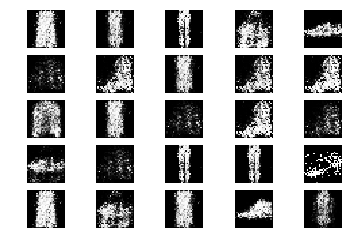

9001 [D loss: 0.449795, acc.: 78.12%] [G loss: 1.267967]
9002 [D loss: 0.535044, acc.: 73.44%] [G loss: 1.264986]
9003 [D loss: 0.462712, acc.: 75.00%] [G loss: 1.283623]
9004 [D loss: 0.459807, acc.: 79.69%] [G loss: 1.321310]
9005 [D loss: 0.395066, acc.: 82.81%] [G loss: 1.296742]
9006 [D loss: 0.374268, acc.: 84.38%] [G loss: 1.378924]
9007 [D loss: 0.394353, acc.: 79.69%] [G loss: 1.387132]
9008 [D loss: 0.325057, acc.: 85.94%] [G loss: 1.400895]
9009 [D loss: 0.592061, acc.: 75.00%] [G loss: 1.565922]
9010 [D loss: 0.495181, acc.: 76.56%] [G loss: 1.483736]
9011 [D loss: 0.347469, acc.: 82.81%] [G loss: 1.251611]
9012 [D loss: 0.506268, acc.: 65.62%] [G loss: 1.372687]
9013 [D loss: 0.528174, acc.: 81.25%] [G loss: 1.105315]
9014 [D loss: 0.402354, acc.: 84.38%] [G loss: 1.057373]
9015 [D loss: 0.572422, acc.: 68.75%] [G loss: 1.206874]
9016 [D loss: 0.487657, acc.: 78.12%] [G loss: 1.159491]
9017 [D loss: 0.447636, acc.: 73.44%] [G loss: 1.240675]
9018 [D loss: 0.550936, acc.: 7

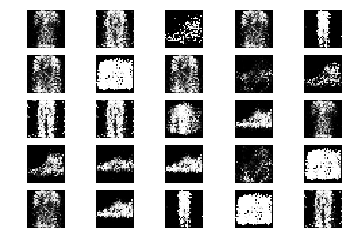

9201 [D loss: 0.404341, acc.: 84.38%] [G loss: 1.735966]
9202 [D loss: 0.508376, acc.: 75.00%] [G loss: 1.693769]
9203 [D loss: 0.459620, acc.: 71.88%] [G loss: 1.638289]
9204 [D loss: 0.553303, acc.: 65.62%] [G loss: 1.695213]
9205 [D loss: 0.372547, acc.: 84.38%] [G loss: 1.423878]
9206 [D loss: 0.481056, acc.: 73.44%] [G loss: 1.449589]
9207 [D loss: 0.689655, acc.: 53.12%] [G loss: 1.131247]
9208 [D loss: 0.632851, acc.: 60.94%] [G loss: 1.259510]
9209 [D loss: 0.499897, acc.: 73.44%] [G loss: 1.311857]
9210 [D loss: 0.497683, acc.: 81.25%] [G loss: 1.382850]
9211 [D loss: 0.635076, acc.: 56.25%] [G loss: 1.173031]
9212 [D loss: 0.647025, acc.: 53.12%] [G loss: 1.209002]
9213 [D loss: 0.563914, acc.: 70.31%] [G loss: 1.274451]
9214 [D loss: 0.566799, acc.: 60.94%] [G loss: 1.159948]
9215 [D loss: 0.673669, acc.: 53.12%] [G loss: 1.186936]
9216 [D loss: 0.527150, acc.: 71.88%] [G loss: 1.098198]
9217 [D loss: 0.636209, acc.: 59.38%] [G loss: 1.268375]
9218 [D loss: 0.494163, acc.: 7

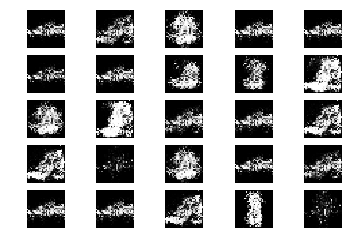

9401 [D loss: 0.286666, acc.: 87.50%] [G loss: 1.908957]
9402 [D loss: 0.293208, acc.: 89.06%] [G loss: 1.855169]
9403 [D loss: 0.325765, acc.: 84.38%] [G loss: 1.693429]
9404 [D loss: 0.538343, acc.: 68.75%] [G loss: 1.743449]
9405 [D loss: 0.437119, acc.: 84.38%] [G loss: 1.590917]
9406 [D loss: 0.383052, acc.: 89.06%] [G loss: 1.809235]
9407 [D loss: 0.333099, acc.: 87.50%] [G loss: 1.962568]
9408 [D loss: 0.247006, acc.: 93.75%] [G loss: 1.943672]
9409 [D loss: 0.322095, acc.: 89.06%] [G loss: 2.093867]
9410 [D loss: 0.448648, acc.: 75.00%] [G loss: 1.885159]
9411 [D loss: 0.509066, acc.: 81.25%] [G loss: 1.900252]
9412 [D loss: 0.313573, acc.: 89.06%] [G loss: 1.856636]
9413 [D loss: 0.382052, acc.: 85.94%] [G loss: 1.865547]
9414 [D loss: 0.293110, acc.: 89.06%] [G loss: 1.863633]
9415 [D loss: 0.470752, acc.: 81.25%] [G loss: 1.721131]
9416 [D loss: 0.402664, acc.: 79.69%] [G loss: 1.724739]
9417 [D loss: 0.313439, acc.: 82.81%] [G loss: 2.140710]
9418 [D loss: 0.470195, acc.: 8

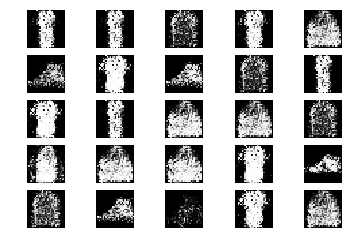

9601 [D loss: 0.511704, acc.: 73.44%] [G loss: 1.487873]
9602 [D loss: 0.467663, acc.: 78.12%] [G loss: 1.666511]
9603 [D loss: 0.739433, acc.: 54.69%] [G loss: 1.697678]
9604 [D loss: 0.434533, acc.: 81.25%] [G loss: 1.642669]
9605 [D loss: 0.560776, acc.: 71.88%] [G loss: 1.659025]
9606 [D loss: 0.568950, acc.: 65.62%] [G loss: 1.712402]
9607 [D loss: 0.495352, acc.: 75.00%] [G loss: 1.674520]
9608 [D loss: 0.413423, acc.: 89.06%] [G loss: 1.494058]
9609 [D loss: 0.553151, acc.: 73.44%] [G loss: 1.719161]
9610 [D loss: 0.473532, acc.: 81.25%] [G loss: 1.546825]
9611 [D loss: 0.616972, acc.: 65.62%] [G loss: 1.660844]
9612 [D loss: 0.481435, acc.: 78.12%] [G loss: 1.679465]
9613 [D loss: 0.592048, acc.: 68.75%] [G loss: 1.524144]
9614 [D loss: 0.501100, acc.: 71.88%] [G loss: 1.352413]
9615 [D loss: 0.502471, acc.: 79.69%] [G loss: 1.145327]
9616 [D loss: 0.555176, acc.: 67.19%] [G loss: 1.622933]
9617 [D loss: 0.555534, acc.: 70.31%] [G loss: 1.778002]
9618 [D loss: 0.524824, acc.: 7

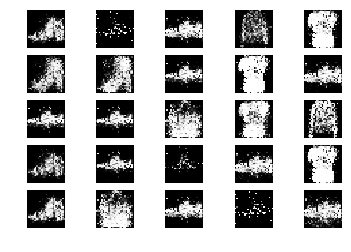

9801 [D loss: 0.354020, acc.: 85.94%] [G loss: 1.401586]
9802 [D loss: 0.359206, acc.: 84.38%] [G loss: 1.521762]
9803 [D loss: 0.474410, acc.: 75.00%] [G loss: 1.497449]
9804 [D loss: 0.297376, acc.: 87.50%] [G loss: 1.470997]
9805 [D loss: 0.450603, acc.: 71.88%] [G loss: 1.498050]
9806 [D loss: 0.426287, acc.: 81.25%] [G loss: 1.260208]
9807 [D loss: 0.476710, acc.: 70.31%] [G loss: 1.462250]
9808 [D loss: 0.384073, acc.: 79.69%] [G loss: 1.844092]
9809 [D loss: 0.463577, acc.: 76.56%] [G loss: 1.750450]
9810 [D loss: 0.455907, acc.: 84.38%] [G loss: 1.537915]
9811 [D loss: 0.285836, acc.: 89.06%] [G loss: 1.420645]
9812 [D loss: 0.463374, acc.: 78.12%] [G loss: 1.406920]
9813 [D loss: 0.397219, acc.: 84.38%] [G loss: 1.548824]
9814 [D loss: 0.328127, acc.: 87.50%] [G loss: 1.482684]
9815 [D loss: 0.418109, acc.: 84.38%] [G loss: 1.518846]
9816 [D loss: 0.387557, acc.: 85.94%] [G loss: 1.493175]
9817 [D loss: 0.382325, acc.: 84.38%] [G loss: 1.544572]
9818 [D loss: 0.460374, acc.: 7

In [11]:
if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=10000, batch_size=32, sample_interval=200)